<a href="https://colab.research.google.com/github/Otobi1/Back-to-Basics-A-Refresher-/blob/master/End_to_End_ML_Tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [556]:
"""Annotation"""

'Annotation'

In [557]:
# Import Library

from collections import Counter, OrderedDict
import ipywidgets as widgets
import itertools
import json
import pandas as pd
from urllib.request import urlopen
import requests

print("Libraries Successfully Imported!")

Libraries Successfully Imported!


In [558]:
# Load projects

url = "https://raw.githubusercontent.com/GokuMohandas/applied-ml/main/datasets/projects.json"

projects = json.loads(urlopen(url).read())

print (json.dumps(projects[-305], indent=2))

{
  "id": 324,
  "title": "AdverTorch",
  "description": "A Toolbox for Adversarial Robustness Research",
  "tags": [
    "code",
    "library",
    "security",
    "adversarial-learning",
    "adversarial-attacks",
    "adversarial-perturbations"
  ]
}


In [559]:
# Load Tags 

url = "https://raw.githubusercontent.com/GokuMohandas/applied-ml/main/datasets/tags.json"

tags_dict = OrderedDict(json.loads(urlopen(url).read()))

print(f"{len(tags_dict)} tags")

400 tags


In [560]:
@widgets.interact(tag = list(tags_dict.keys()))

def display_tag_details(tag = "question-answering"):
  
  print(json.dumps(tags_dict[tag], indent = 2))

interactive(children=(Dropdown(description='tag', index=283, options=('3d', 'action-localization', 'action-rec…

In [561]:
# Create Dataframe

df = pd.DataFrame(projects)

print (f"{len(df)} projects")

df.head(5)

2032 projects


,id,title,description,tags
0,2438,How to Deal with Files in Google Colab: What Y...,How to supercharge your Google Colab experienc...,"[article, google-colab, colab, file-system]"
1,2437,Rasoee,A powerful web and mobile application that ide...,"[api, article, code, dataset, paper, research,..."
2,2436,Machine Learning Methods Explained (+ Examples),Most common techniques used in data science pr...,"[article, deep-learning, machine-learning, dim..."
3,2435,Top “Applied Data Science” Papers from ECML-PK...,Explore the innovative world of Machine Learni...,"[article, deep-learning, machine-learning, adv..."
4,2434,OpenMMLab Computer Vision,MMCV is a python library for CV research and s...,"[article, code, pytorch, library, 3d, computer..."


In [562]:
# Input 
# - here, we are using the projects title and description combined as one input feature

df["text"] = df.title + " " +df.description

In [563]:
def filter(l, include = [], exclude = []):
  """Filter a list using inclusion and exclusion lists of items. """
  
  filtered = [item for item in l if item in include and item not in exclude]
  return filtered

In [564]:
# Inclusion/Exclusion Criteria for Tags

include = list(tags_dict.keys())

exclude = ["machine-learning", "deep-learning", "data-science", "neural-networks", 
           "python", "r", "visualization"]

In [565]:
# Filter tags for each project

df.tags = df.tags.apply(filter, include = include, exclude = exclude)

tags = Counter(itertools.chain.from_iterable(df.tags.values))

In [566]:
# Here, we will restrict the mapping only to tags that are above a certain frequency threshold
# - the tags that do not have enough projects will not have enough samples to model their relationships

@widgets.interact(min_tag_freq = (0, tags.most_common() [0][1]))

def separate_tags_by_freq(min_tag_freq = 30):
  tags_above_freq = Counter(tag for tag in tags.elements()
                                  if tags[tag] >= min_tag_freq)
  
  tags_below_freq = Counter(tag for tag in tags.elements()
                                  if tags[tag] < min_tag_freq)
  
  print("Most popular tags:\n", tags_above_freq.most_common(5))   

  print("\nTags that just made the cut:\n", tags_above_freq.most_common()[-5:])

  print("\nTags that just missed the cut:\n", tags_below_freq.most_common(5))

interactive(children=(IntSlider(value=30, description='min_tag_freq', max=429), Output()), _dom_classes=('widg…

In [567]:
# Filter tags that have fewer tha <min_tag_freq> occurences

min_tag_freq = 30

tags_above_freq = Counter(tag for tag in tags.elements()
                                if tags[tag] >= min_tag_freq)

df.tags = df.tags.apply(filter, include = list(tags_above_freq.keys()))

In [568]:
# Remove Projects with no more remaining relevant tags

df = df[df.tags.map(len) > 0]

print(f"{len(df)} projects")

1444 projects


In [569]:
""" Exploratory Data Analysis\n
the goal of EDA is not just to plot interesting charts and graphs, raher it \n
serves to facilitate an inquiry on the problem at hand, and if the available data\n
is sufficient for the task. Ideally EDA should iterative, you should revisit it\n
as your data increases.
 """

' Exploratory Data Analysis\n\nthe goal of EDA is not just to plot interesting charts and graphs, raher it \n\nserves to facilitate an inquiry on the problem at hand, and if the available data\n\nis sufficient for the task. Ideally EDA should iterative, you should revisit it\n\nas your data increases.\n '

In [570]:
# Importing Libraries 

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings("ignore")

print("Libraries Successfully Imported!")

Libraries Successfully Imported!


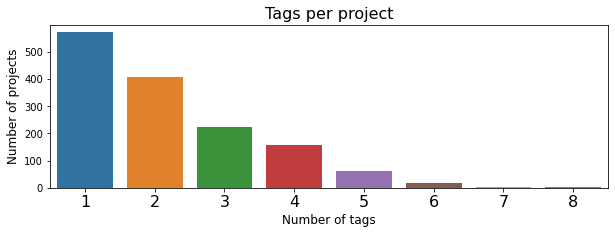

In [571]:
# Number of Tags per Project - How many tags do the projects have? (we dont want to overwhelm the user with too many tags)

num_tags_per_project = [len(tags) for tags in df.tags]
num_tags, num_projects = zip(*Counter(num_tags_per_project).items())
plt.figure(figsize = (10, 3))
ax = sns.barplot(list(num_tags), list(num_projects))
plt.title("Tags per project", fontsize = 16)
plt.xlabel("Number of tags", fontsize = 12)
ax.set_xticklabels(range(1, len(num_tags) + 1), rotation = 0, fontsize = 16)
plt.ylabel("Number of projects", fontsize = 12)
plt.show()

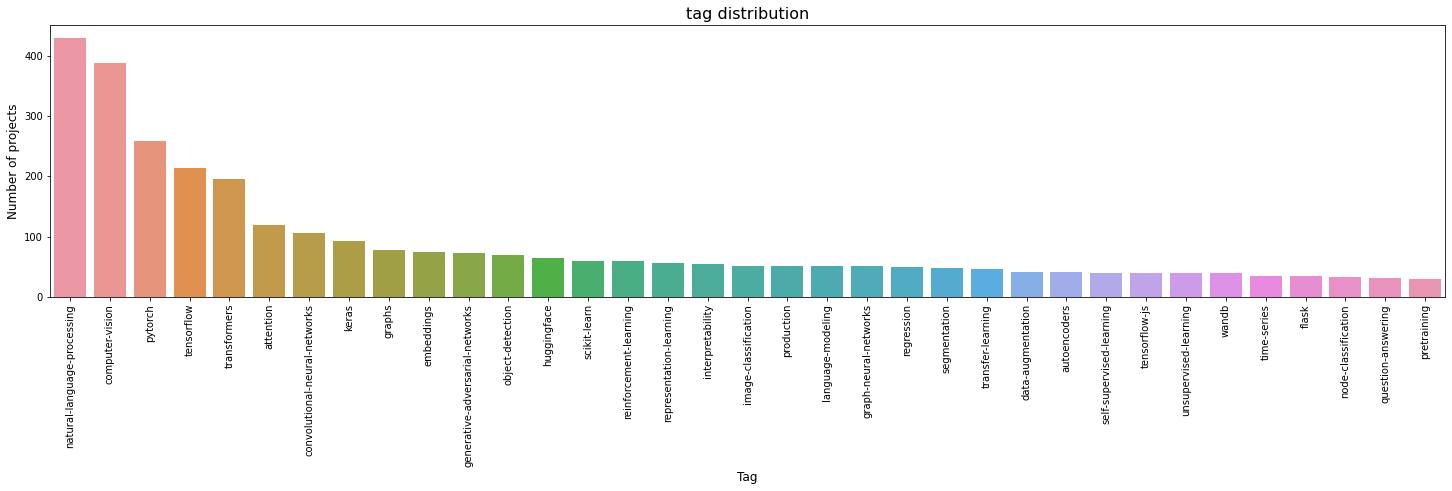

In [572]:
# Distribution of Tags - What are the most common tags?

all_tags = list(itertools.chain.from_iterable(df.tags.values))
tags, tag_counts = zip(*Counter(all_tags).most_common())
plt.figure(figsize = (25, 5))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("tag distribution", fontsize = 16)
plt.xlabel("Tag", fontsize = 12)
ax.set_xticklabels(tags, rotation = 90, fontsize = 10)
plt.ylabel("Number of projects", fontsize = 12)
plt.show()

In [573]:
# Wordcloud - is there enough signal in the title and description that is unique to each tag

# - this is important because we want to know if the projects title and description are highly influential features

@widgets.interact(tag = list(tags))
def display_word_cloud(tag = "pytorch"):

  # Plot word cloud of top tags
  
  plt.figure(figsize = (30, 5))
  subset = df[df.tags.apply(lambda tags: tag in tags)]
  text = subset.text.values
  cloud = WordCloud(
      stopwords = STOPWORDS, background_color = "black", collocations = False,
      width = 1500, height = 500).generate(" ".join(text))
  plt.axis("off")
  plt.imshow(cloud)

interactive(children=(Dropdown(description='tag', index=2, options=('natural-language-processing', 'computer-v…

In [574]:
"""Splitting"""

# to determine the effectiveness of our model, we need to have an unbiased measureing approach
# - to do this, we split the dataset into training, validation and test data split. 

# -- use the training split to train the model (here the model will have access to both the inputs and outputs to optimise its internal weights)
# -- after each loop (epoch) of the training split, we will use the validation split to determine the model performance
# --** here the model will not use the outputs to optimise the weights, rather, it will use performance to optimise training hyperparameters such as learning rate
# -- after the training stops, we will use the testing split to perform a one-time assessment of the model
# --** this is the best measure of how the model may behave on new unseen data. 
# --** training stops when the performance improvement is not significant or any other stopping criteria that we specified


'Splitting'

In [575]:
# Before splitting the dataset, we need to encode the output labels, essentially assigning each tag a unique index

import numpy as np
import random

print("Libraries Successfully Imported!")

Libraries Successfully Imported!


In [576]:
# Set seed for reproducibility 

seed = 1234
np.random.seed(seed)
random.seed(seed)

In [577]:
# Shuffle - because latest projects are upfront and certain tags are trending
# - if we dont shuffle before creating the data split, the model will only be trained on earlier tags and perform poorly on others

df = df.sample(frac = 1).reset_index(drop = True)

In [578]:
# Get Data

X = df.text.to_numpy()
y = df.tags

In [579]:
X, y

(array(['NBA k-means Extraction of NBA statistics from "basketball-reference.com" to visualise them and detect trends and patterns. Clustering of the top players using KMeans.',
        'AI Basketball Analysis 🏀   AI web app and API to analyze basketball shots and shooting pose. ',
        'NSFW Image Moderation Admin App with ReactJS A fully-functional NSFW Admin Application for simplified image classification & moderation built with Node.js, TensorFlow.js, and React',
        ...,
        'Tutorials | TensorFlow Core The TensorFlow tutorials are written as Jupyter notebooks and run directly in Google Colab—a hosted notebook environment that requires no setup. ',
        'Document search engine NLP based search engine for single page pdf files.',
        'BiT: Exploring Large-Scale Pre-training for Compute We are excited to share the best BiT models pre-trained on public datasets, along with code in TF2, Jax, and PyTorch. '],
       dtype=object), 0                                    

In [580]:
class LabelEncoder(object):
    """Label encoder for tag labels."""
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"

    def fit(self, y):
        classes = np.unique(list(itertools.chain.from_iterable(y)))
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self

    def encode(self, y):
        y_one_hot = np.zeros((len(y), len(self.class_to_index)), dtype=int)
        for i, item in enumerate(y):
            for class_ in item:
                y_one_hot[i][self.class_to_index[class_]] = 1
        return y_one_hot

    def decode(self, y):
        classes = []
        for i, item in enumerate(y):
            indices = np.where(item == 1)[0]
            classes.append([self.index_to_class[index] for index in indices])
        return classes

    def save(self, fp):
        with open(fp, 'w') as fp:
            contents = {'class_to_index': self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, 'r') as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [581]:
# Encode

label_encoder = LabelEncoder()
label_encoder.fit(y)
num_classes = len(label_encoder)

In [582]:
label_encoder.class_to_index

{'attention': 0,
 'autoencoders': 1,
 'computer-vision': 2,
 'convolutional-neural-networks': 3,
 'data-augmentation': 4,
 'embeddings': 5,
 'flask': 6,
 'generative-adversarial-networks': 7,
 'graph-neural-networks': 8,
 'graphs': 9,
 'huggingface': 10,
 'image-classification': 11,
 'interpretability': 12,
 'keras': 13,
 'language-modeling': 14,
 'natural-language-processing': 15,
 'node-classification': 16,
 'object-detection': 17,
 'pretraining': 18,
 'production': 19,
 'pytorch': 20,
 'question-answering': 21,
 'regression': 22,
 'reinforcement-learning': 23,
 'representation-learning': 24,
 'scikit-learn': 25,
 'segmentation': 26,
 'self-supervised-learning': 27,
 'tensorflow': 28,
 'tensorflow-js': 29,
 'time-series': 30,
 'transfer-learning': 31,
 'transformers': 32,
 'unsupervised-learning': 33,
 'wandb': 34}

In [583]:
# Since we are dealing with a multilabel classification, we're going to convert our label indices into one-hot representation where each input' set is represented by a binary array

# - Sample

label_encoder.encode([["attention", "data-augmentation"]])

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [584]:
# Encode all out labels

y = label_encoder.encode(y)

In [585]:
""" Splitting"""
# Naive Split

' Splitting'

In [586]:
!pip install scikit-multilearn 

In [587]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

print("Libraries Successfully Imported!")

Libraries Successfully Imported!


In [588]:
# Split sizes

train_size = 0.7
val_size = 0.15
test_size = 0.15

In [589]:
# Split (train)

X_train, X_, y_train, y_ = train_test_split(X, y, train_size = train_size)

In [590]:
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f}) \n"
      f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 1010 (0.70) 
remaining: 434 (0.30)


In [591]:
# Split (test)

X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size = 0.5)

In [592]:
print(f"train: {len(X_train)} ({(len(X_train) / len(X)): 2f})\n"
      f"val: {len(X_val)} ({len(X_val) / len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test) / len(X):.2f})")

train: 1010 ( 0.699446)
val: 217 (0.15)
test: 217 (0.15)


In [593]:
# Get counts for each class 

counts = {}
counts["train_counts"] = Counter(str(combination) for row in 
                                 get_combination_wise_output_matrix(
                                     y_train, order = 1) for combination in row)
counts["val_counts"] = Counter(str(combination) for row in 
                               get_combination_wise_output_matrix(
                                   y_val, order = 1) for combination in row)
counts["test_counts"] = Counter(str(combination) for row in 
                                get_combination_wise_output_matrix(
                                    y_test, order = 1) for  combination in row)

In [594]:
# View distributions 

pd.DataFrame({
    "train": counts["train_counts"], 
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)

# Its hard to compare this because our train and test proportions are different. 
# - Lets see what the distribution will look like once we balance it out.

,"(19,)","(25,)","(2,)","(3,)","(15,)","(32,)","(18,)","(14,)","(26,)","(0,)","(4,)","(30,)","(22,)","(6,)","(17,)","(27,)","(33,)","(20,)","(1,)","(31,)","(28,)","(5,)","(11,)","(23,)","(7,)","(8,)","(9,)","(13,)","(10,)","(12,)","(21,)","(29,)","(16,)","(24,)","(34,)"
train,32,40,266,73,289,129,16,36,32,81,25,26,36,26,45,28,32,179,31,35,149,54,36,44,49,39,56,64,38,44,27,28,22,40,28
val,11,11,54,16,69,36,5,9,12,20,10,3,10,4,13,5,4,44,5,4,26,7,5,7,9,3,9,13,16,4,2,3,5,7,7
test,8,9,68,17,71,31,9,6,4,19,6,5,3,4,11,7,3,35,5,7,38,14,10,8,15,9,13,16,10,7,3,9,6,10,4


In [595]:
# Adjust counts across splits 

for k in counts["val_counts"].keys():
  counts["val_counts"][k] = int(counts["val_counts"][k] * \
                                (train_size/val_size))  

for k in counts["test_counts"].keys():
  counts["test_counts"][k] = int(counts["test_counts"][k] * \
                                 (train_size/test_size))

In [596]:
dist_df = pd.DataFrame({
    "train": counts["train_counts"], 
    "val": counts["val_counts"], 
    "test": counts["test_counts"]
}).T.fillna(0)

dist_df

,"(19,)","(25,)","(2,)","(3,)","(15,)","(32,)","(18,)","(14,)","(26,)","(0,)","(4,)","(30,)","(22,)","(6,)","(17,)","(27,)","(33,)","(20,)","(1,)","(31,)","(28,)","(5,)","(11,)","(23,)","(7,)","(8,)","(9,)","(13,)","(10,)","(12,)","(21,)","(29,)","(16,)","(24,)","(34,)"
train,32,40,266,73,289,129,16,36,32,81,25,26,36,26,45,28,32,179,31,35,149,54,36,44,49,39,56,64,38,44,27,28,22,40,28
val,51,51,252,74,322,168,23,42,56,93,46,14,46,18,60,23,18,205,23,18,121,32,23,32,42,14,42,60,74,18,9,14,23,32,32
test,37,42,317,79,331,144,42,28,18,88,28,23,14,18,51,32,14,163,23,32,177,65,46,37,70,42,60,74,46,32,14,42,28,46,18


In [597]:
# Standard deviation 

np.mean(np.std(dist_df.to_numpy(), axis = 0))

9.73409905933911

In [598]:
# Stratified Split 

# some of the distribution under the naive split are not impressive, we will balance them out a bit better using stratified split

# iterative stratification via skmultilearn essentially splits each input into subsets and then distributes the samples starting with the fewest positive samples and working up to the inputs with the most labels

In [599]:
from skmultilearn.model_selection import IterativeStratification

In [600]:
def iterative_train_test_split(X, y, train_size):

  """ Custome iterative train test split which maintains balanced 
  representation with respect to order-th label combinations."""
  
  stratifier = IterativeStratification(
      n_splits = 2, order = 1, sample_distribution_per_fold = [1.0-train_size, train_size])
  train_indices, test_indices = next(stratifier.split(X, y))
  X_train, y_train = X[train_indices], y[train_indices]
  X_test, y_test = X[test_indices], y[test_indices]
  return X_train, X_test, y_train, y_test

In [601]:
# Get data

X = df.text.to_numpy()
y = df.tags

In [602]:
# Binarize y

label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.encode(y)

In [603]:
# Split

X_train, X_, y_train, y_ = iterative_train_test_split(
    X, y, train_size = train_size)
X_val, X_test, y_val, y_test = iterative_train_test_split(
    X_, y_, train_size = 0.5)

In [604]:
print(f"train: {len(X_train)} ({len(X_train) / len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val) / len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test) / len(X):.2f})")

train: 1008 (0.70)
val: 219 (0.15)
test: 217 (0.15)


In [605]:
# Get counts for each class

counts = {}
counts["train_counts"] = Counter(str(combination) for row in 
                                 get_combination_wise_output_matrix(
                                     y_train, order = 1) for combination in row)
counts["val_counts"] = Counter(str(combination) for row in 
                               get_combination_wise_output_matrix(
                                   y_val, order = 1) for combination in row)
counts["test_counts"] = Counter(str(combination) for row in 
                                get_combination_wise_output_matrix(
                                    y_test, order = 1) for combination in row)

In [606]:
for k in counts["val_counts"].keys():
  counts["val_counts"][k] = int(counts["val_counts"][k] *\
                                (train_size/val_size))
for k in counts["test_counts"].keys():
  counts["test_counts"][k] = int(counts["test_counts"][k] *\
                                 (train_size/test_size))

In [607]:
# View distributions

pd.DataFrame({
    "train": counts["train_counts"], 
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)

,"(25,)","(2,)","(3,)","(20,)","(15,)","(10,)","(32,)","(0,)","(8,)","(9,)","(12,)","(30,)","(28,)","(1,)","(6,)","(13,)","(26,)","(17,)","(23,)","(18,)","(19,)","(27,)","(11,)","(31,)","(34,)","(29,)","(22,)","(4,)","(21,)","(24,)","(5,)","(14,)","(16,)","(7,)","(33,)"
train,42,272,74,181,300,45,140,84,36,55,38,24,149,29,24,65,33,48,41,21,36,28,33,31,27,28,34,28,24,42,52,32,25,51,27
val,42,270,74,182,303,42,116,79,32,56,37,23,149,28,23,65,46,46,42,23,37,28,32,28,18,28,37,32,9,51,51,23,28,51,28
test,42,270,74,177,298,46,144,88,37,51,42,23,149,28,23,65,23,51,42,18,32,28,51,42,37,28,32,28,28,18,56,65,9,51,28


In [608]:
dist_df = pd.DataFrame({
    "train": counts["train_counts"], 
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)

In [609]:
# Standard Deviation 

np.mean(np.std(dist_df.to_numpy(), axis = 0))

# the standardard deviation is much better but not 0 (perfect splits). Although the std of my lesson material is 3.1423 and mine is 1.6858 (omo, e don change o)

3.5582992220732566

In [610]:
"""Preprocessing - these are categorised into preparation and transformation
Certain preprocessing steps are global (don't depend on our dataset) 
and others are local (constructs are learned from the training splits). 
For the local, dataset-dependent preprocessing steps, we want to ensure t
hat we split the data first before preprocessing to avoid data leaks.

We covered splitting first since many preprocessing transformations depend
 on the training split and our data splits were dependent only on the target 
 labels (tags) which were already cleaned. However, you need to clean your 
 data first before splitting, at least for the features that splitting 
 depends on. So the process is more like: 
 preprocessing (global, cleaning) → splitting → preprocessing (local, transformations).
"""

"Preprocessing - these are categorised into preparation and transformation\nCertain preprocessing steps are global (don't depend on our dataset) \nand others are local (constructs are learned from the training splits). \nFor the local, dataset-dependent preprocessing steps, we want to ensure t\nhat we split the data first before preprocessing to avoid data leaks.\n\nWe covered splitting first since many preprocessing transformations depend\n on the training split and our data splits were dependent only on the target \n labels (tags) which were already cleaned. However, you need to clean your \n data first before splitting, at least for the features that splitting \n depends on. So the process is more like: \n preprocessing (global, cleaning) → splitting → preprocessing (local, transformations).\n"

In [611]:
# Data Preparation typically involves 
# - Joins, - performing sql joins with existing tables to organise all the relevant data into one view
# - Typing, - ensuring all values for a specific feature are of the same data type, otherwise you can't compare them
# - Missing values, - omit, samples with missing values, if a small subset is missing it
                  # - omit the entire feature, if too many samples are missing the val
                  # - fill in missing values for features (using domain knowledge, heuristics etc)
                  # - may not always seem missing, e.g 0, null, NA
# Outliers, - craft assumptions about what is a normal expected value
          # - be careful about removing important outliers e.g fraud
          # - annomalies can be global (point) contextual (conditional) or collective 
# Clean,  - use domain expertise and EDA
        # - images (crop, resize, clip etc)
        # - text (lower, stem, lemmatize, regex etc)    

In [612]:
# Data Transformation involves feature encoding and engineering
# See https://madewithml.com/courses/applied-ml/preprocessing/ for more details on preprocessing 

In [613]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

print("Libraries Successfully Imported")

Libraries Successfully Imported


In [614]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [615]:
def preprocess(text, lower = True, stem = False,
               filters = "[!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~]", stopwords = STOPWORDS):
  
  """Conditional preprocessing on our text, unique to our task"""

  # Lower
  if lower:
    text = text.lower()

  # Remove stopwords using the nltk package
  pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
  text = pattern.sub('', text)

  # Space and filters
  text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)
  text = re.sub(filters, r"", text)
  text = re.sub('[^A-Za-z0-9]+', ' ', text) # remove non alphanumeric chars
  text = re.sub(' +', ' ', text) # remove multiple spaces
  text = text.strip()

  # Remove links (urls)
  text = re.sub(r'http\S+', '', text)

  # Stemming (conditional)
  if stem:
    text = " ".join([porter.stem(word) for word in text.split(' ')])
  return text

In [616]:
@widgets.interact(lower = True, stem = False)

def display_preprocessed_text(lower, stem):
  # filters = "[!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~]" we didnt need to add the filter here since we added it to the preprocess function above
  text = "Conditional Image Generation using Variational Autoencoders and GANs."
  preprocessed_text = preprocess(text = text, lower = lower, stem = stem)
  print(preprocessed_text)

interactive(children=(Checkbox(value=True, description='lower'), Checkbox(value=False, description='stem'), Ou…

In [617]:
# Apply preprocess steps to the dataframe 

preprocessed_df = df.copy()

preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower = True, stem = False)

print (f"{df.text.values[0]}\n\n{preprocessed_df.text.values[0]}")

NBA k-means Extraction of NBA statistics from "basketball-reference.com" to visualise them and detect trends and patterns. Clustering of the top players using KMeans.

nba k means extraction nba statistics basketball reference com visualise detect trends patterns clustering top players using kmeans


In [618]:
""" Baselines"""

' Baselines'

In [619]:
# Modelling 

# - we'll begin modelling by starting with the simplest baseline and slowly adding complexity in the following order 

# - Random, Rule-based, Simple ML, CNN w/ embeddings, RNN w/ embeddings and Transformers w/embeddings

In [620]:
# Random

# - Import the necessary libraries 

from sklearn.metrics import precision_recall_fscore_support
import torch

print ("Libraries successfully imported!!")

Libraries successfully imported!!


In [621]:
# Set seed for reproducibility 

def set_seeds(seed = 1234):
  np.random.seed(seed)
  random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed) # multi-GPU

In [622]:
# Getting the data splits

def get_data_splits(df, train_size = 0.7):

  # Get data
  X = df.text.to_numpy()
  y = df.tags

  # Binarise y 
  label_encoder = LabelEncoder()
  label_encoder.fit(y)
  y = label_encoder.encode(y)

  # Split
  X_train, X_, y_train, y_ = iterative_train_test_split(X, y, train_size = train_size)
  X_val, X_test, y_val, y_test = iterative_train_test_split(X_, y_, train_size = 0.5)

  return X_train, X_val, X_test, y_train, y_val, y_test, label_encoder

In [623]:
# Defining a trainer object to be used in traing, validation and inference 

class Trainer(object):
  
  def __init__(self, model, device, loss = None, optimiser = None, scheduler = None):

    # Set parameters
    self.model = model 
    self.device = device 
    self.loss = loss
    self.optimiser = optimiser
    self.scheduler = scheduler

  # Defining the training step function
  def train_step(self, dataloader):
    
    # Set the model to train mode
    self.model.train()
    loss = 0.0

    # Iterate over the training batches 
    for i, batch in enumerate(dataloader):

      # Step
      batch = [item.to(self.device) for item in batch] # set device
      inputs, targets = batch[:-1], batch[-1]
      self.optimiser.zero_grad() # Reset gradients
      z = self.model(inputs) # Forward pass
      J = self.loss(z, targets) # Define loss
      J.backward() # Backward pass
      self.optimiser.step() # Update weights

      # Cumulative Metrics
      loss += (J.detach().item() - loss) / (i + 1)
      
    return loss  

  # Defining the validation or test step function
  def eval_step(self, dataloader):

    # Set model to eval mode
    self.model.eval()
    loss = 0.0
    y_trues, y_probs = [], []

    # Iterate over val batches 
    with torch.no_grad():
      for i, batch in enumerate(dataloader):
        
        # Step
        batch = [item.to(self.device) for item in batch] # Set device
        inputs, y_true = batch[:-1], batch[-1]
        z = self.model(inputs) # forward pass
        J = self.loss(z, y_true).item()

        # Cumulative Metrics
        loss += (J - loss) / (i + 1)

        # Store outputs 
        y_prob = torch.sigmoid(z).cpu().numpy()
        y_probs.extend(y_prob)
        y_trues.extend(y_true.cpu().numpy())

    return loss, np.vstack(y_trues), np.vstack(y_probs)

  # Defining the prediction step function 
  def predict_step(self, dataloader):

    # Set model to eval mode
    self.model.eval()
    y_probs = []

    # iterate over val batches
    with torch.no_grad():
      for i, batch in enumerate(dataloader):

        # Forward pass w/ inputs
        inputs, targets = batch[:-1], batch[-1]
        y_prob = self.model(inputs)

        # Store outputs
        y_probs.extend(y_prob)

    return np.vstack(y_prob)

  def train(self, num_epochs, patience, train_dataloader, val_dataloader):
    best_val_loss = np.inf
    for epoch in range(num_epochs):

      # Steps
      train_loss = self.train_step(dataloader = train_dataloader)
      val_loss, _, _ = self.eval_step(dataloader = val_dataloader)
      self.scheduler.step(val_loss)

      # Early stopping
      if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = self.model
        _patience = patience # resent _patience
      else:
        _patience -= 1
      if not _patience: # 0
        print ("Stopping early fa!")
        break
        
      # Logging
      print (
          f"Epoch: {epoch + 1} |"
          f"train_loss: {train_loss:.5f}, "
          f"val_loss: {val_loss:.5f}, "
          f"lr: {self.optimiser.param_groups[0]['lr']:.2E}, "
          f"_patience: {_patience}"
        )
    return best_model

In [624]:
# Per class performance metrics 

def get_performance(y_true, y_pred, classes):

  # Get metrics 
  performance = {'overall': {}, 'class': {}}
  metrics = precision_recall_fscore_support(y_true, y_pred)

  # Overall performance 
  performance['overall']['precision'] = np.mean(metrics[0])
  performance['overall']['recall'] = np.mean(metrics[1])
  performance['overall']['f1'] = np.mean(metrics[2])
  performance['overall']['num_samples'] = np.float64(np.sum(metrics[3]))

  # Per class performance
  for i in range(len(classes)):
    performance['class'][classes[i]] = {
        "precision": metrics[0][i], 
        "recall": metrics[1][i], 
        "f1": metrics[2][i], 
        "num_samples": np.float64(metrics[3][i])
    }
  return performance

In [625]:
# Implementing Random

# - Essentially, we want to know what random chance looks like. 
# ** all of our efforts should be well above this**

# Set seeds 

set_seeds()

In [626]:
# Get data splits 

preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower = True, stem = True)

X_train, X_val, X_test, y_train, y_val, y_test,label_encoder = get_data_splits(preprocessed_df)

print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1008,), y_train: (1008, 35)
X_val: (213,), y_val: (213, 35)
X_test: (223,), y_test: (223, 35)


In [627]:
# Label encoder 

print (label_encoder)
print (label_encoder.classes)

<LabelEncoder(num_classes=35)>
['attention', 'autoencoders', 'computer-vision', 'convolutional-neural-networks', 'data-augmentation', 'embeddings', 'flask', 'generative-adversarial-networks', 'graph-neural-networks', 'graphs', 'huggingface', 'image-classification', 'interpretability', 'keras', 'language-modeling', 'natural-language-processing', 'node-classification', 'object-detection', 'pretraining', 'production', 'pytorch', 'question-answering', 'regression', 'reinforcement-learning', 'representation-learning', 'scikit-learn', 'segmentation', 'self-supervised-learning', 'tensorflow', 'tensorflow-js', 'time-series', 'transfer-learning', 'transformers', 'unsupervised-learning', 'wandb']


In [628]:
# Generate random predictions 

y_pred = np.random.randint(low = 0, high = 2, size = (len(y_test), len(label_encoder.classes)))

print (y_pred.shape)
print (y_pred[0:5])

(223, 35)
[[0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1]
 [0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0]
 [0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1]
 [0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0]
 [0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0]]


In [629]:
# Evaluate

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = label_encoder.classes)

print (json.dumps(performance['overall'], indent = 2))

{
  "precision": 0.06763293351390938,
  "recall": 0.5201279436901358,
  "f1": 0.11036841738864332,
  "num_samples": 488.0
}


In [630]:
# We made the assumption that there is an equal probabiltiy for whether an input has a tag or not, but this isnt true
# Lets use the train split to figure out what the true probability is

# Percentage of 1s (tag presence)

tag_p = np.sum(np.sum(y_train)) / (len(y_train) * len(label_encoder.classes))

print (tag_p)

0.06232993197278912


In [631]:
# Generate weighted random predictions 

y_pred = np.random.choice(
    np.arange(0, 2), size = (len(y_test), len(label_encoder.classes)), p = [1 - tag_p, tag_p])

In [632]:
# Validate percentage 

np.sum(np.sum(y_pred)) / (len(y_pred) * len(label_encoder.classes))

0.061242793081358105

In [633]:
# Evaluate

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = label_encoder.classes)

print (json.dumps(performance['overall'], indent = 2))

# Conclusion - we didnt use the tokens in our inputs to influence the prediction, so nothing was learned.

{
  "precision": 0.05139707398110759,
  "recall": 0.0525282107055506,
  "f1": 0.04248785604937336,
  "num_samples": 488.0
}


In [634]:
## Rule based
# - Now, we will use the signals in the inputs with domain expertise and aux data to determine the labels 

# Set seeds 

set_seeds()

In [635]:
# Unstemmed 

# Get data splits 

preprocessed_df = df.copy()

preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower = True)

X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [636]:
# Restrict to relevant tags

print (len(tags_dict))
tags_dict = {tag: tags_dict[tag] for tag in label_encoder.classes}

print (len(tags_dict))

400
35


In [637]:
# Map aliases

aliases = {}

for tag, values in tags_dict.items():
  aliases[preprocess(tag)] = tag
  for alias in values["aliases"]:
    aliases[preprocess(alias)] = tag

aliases

{'ae': 'autoencoders',
 'attention': 'attention',
 'autoencoders': 'autoencoders',
 'cnn': 'convolutional-neural-networks',
 'computer vision': 'computer-vision',
 'convolutional neural networks': 'convolutional-neural-networks',
 'cv': 'computer-vision',
 'data augmentation': 'data-augmentation',
 'embeddings': 'embeddings',
 'flask': 'flask',
 'gan': 'generative-adversarial-networks',
 'generative adversarial networks': 'generative-adversarial-networks',
 'gnn': 'graph-neural-networks',
 'graph neural networks': 'graph-neural-networks',
 'graphs': 'graphs',
 'huggingface': 'huggingface',
 'image classification': 'image-classification',
 'image segmentation': 'segmentation',
 'interpretability': 'interpretability',
 'keras': 'keras',
 'language modeling': 'language-modeling',
 'lm': 'language-modeling',
 'natural language processing': 'natural-language-processing',
 'nlp': 'natural-language-processing',
 'nlproc': 'natural-language-processing',
 'node classification': 'node-classifica

In [638]:
# if token matches an alias, then add the corresponding tag class and parent tags if any

def get_classes(text, aliases, tags_dict):

  classes = []
  for alias, tag in aliases.items():
    if alias in text:
      classes.append(tag)
      for parent in tags_dict[tag]["parents"]:
        classes.append(parent)
  return list(set(classes))

In [639]:
# Sample 

text = "This project extends gans for data augmentation specifically for object detection tasks."

get_classes(text = preprocess(text), aliases = aliases, tags_dict = tags_dict)

['object-detection',
 'generative-adversarial-networks',
 'computer-vision',
 'data-augmentation']

In [640]:
# Prediction 

y_pred = []
for text in X_test:
  classes = get_classes(text, aliases, tags_dict)
  y_pred.append(classes)

In [641]:
y_pred = label_encoder.encode(y_pred)

In [642]:
# Evaluate

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = label_encoder.classes)

print (json.dumps(performance["overall"], indent = 4))

{
    "precision": 0.8552670716380394,
    "recall": 0.46130628300271154,
    "f1": 0.5571173115985636,
    "num_samples": 488.0
}


In [643]:
# inspection 

tag = "transformers"

print (json.dumps(performance["class"][tag], indent = 2))

{
  "precision": 0.875,
  "recall": 0.2413793103448276,
  "f1": 0.3783783783783784,
  "num_samples": 29.0
}


In [644]:
# Stemmed

# - before we do more analysis, lets see if we can do better 
# we are looking for perfect matches in the aliases which is not always possible

print (aliases[preprocess('gan')])
# print (aliases[preprocess('gans')]) # this won't find any match
print (aliases[preprocess('generative adversarial networks')])
# print (aliases[preprocess('generative adversarial network')]) # this won't find any match

generative-adversarial-networks
generative-adversarial-networks


In [645]:
## We dont want to keep adding explicit rules but we can use stemming to represent different forms of a word uniformly 

print (porter.stem("democracy"))
print (porter.stem("democracies"))

democraci
democraci


In [646]:
# Lets also stem the aliases as well as the tokens in our inpu text and then look for matches 

# Get data splits

preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower = True, stem = True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [647]:
# Map aliases 

aliases = {}

for tag, values in tags_dict.items():
  aliases[preprocess(tag, stem = True)] = tag
  for alias in values["aliases"]:
    aliases[preprocess(alias, stem = True)] = tag

aliases

{'ae': 'autoencoders',
 'attent': 'attention',
 'autoencod': 'autoencoders',
 'cnn': 'convolutional-neural-networks',
 'comput vision': 'computer-vision',
 'convolut neural network': 'convolutional-neural-networks',
 'cv': 'computer-vision',
 'data augment': 'data-augmentation',
 'embed': 'embeddings',
 'flask': 'flask',
 'gan': 'generative-adversarial-networks',
 'gener adversari network': 'generative-adversarial-networks',
 'gnn': 'graph-neural-networks',
 'graph': 'graphs',
 'graph neural network': 'graph-neural-networks',
 'huggingfac': 'huggingface',
 'imag classif': 'image-classification',
 'imag segment': 'segmentation',
 'interpret': 'interpretability',
 'kera': 'keras',
 'languag model': 'language-modeling',
 'lm': 'language-modeling',
 'natur languag process': 'natural-language-processing',
 'nlp': 'natural-language-processing',
 'nlproc': 'natural-language-processing',
 'node classif': 'node-classification',
 'object detect': 'object-detection',
 'pre train': 'pretraining',


In [648]:
# Checks (we will write proper tests soon)

print (aliases[preprocess('gan', stem=True)])
print (aliases[preprocess('gans', stem=True)])
print (aliases[preprocess('generative adversarial network', stem=True)])
print (aliases[preprocess('generative adversarial networks', stem=True)])

generative-adversarial-networks
generative-adversarial-networks
generative-adversarial-networks
generative-adversarial-networks


In [649]:
# Sample

text = "This project extends gans for data augmentation specifically for object detection tasks."
get_classes(text=preprocess(text, stem=True), aliases=aliases, tags_dict=tags_dict)

['object-detection',
 'generative-adversarial-networks',
 'computer-vision',
 'data-augmentation']

In [650]:
# Prediction
y_pred = []
for text in X_test:
    classes = get_classes(text, aliases, tags_dict)
    y_pred.append(classes)

In [651]:
# Encode labels
y_pred = label_encoder.encode(y_pred)

In [652]:
# Evaluate 

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = label_encoder.classes)

print (json.dumps(performance['overall'], indent = 4))

{
    "precision": 0.8283699157984872,
    "recall": 0.5008459138555391,
    "f1": 0.59510939619819,
    "num_samples": 462.0
}


In [653]:
# Inspection 

tag = "transformers"

print (json.dumps(performance["class"][tag], indent = 2))

{
  "precision": 0.9166666666666666,
  "recall": 0.4230769230769231,
  "f1": 0.5789473684210527,
  "num_samples": 26.0
}


In [654]:
# True Positives, False Positives, False Negative Samples 

index = label_encoder.class_to_index[tag]

tp, fp, fn = [], [], []
for i in range(len(y_test)):
  true = y_test[i][index]
  pred = y_pred[i][index]

  if true and pred:
    tp.append(i)
  elif not true and pred:
      fp.append(i)
  elif true and not pred:
        fn.append(i)

In [655]:
print (tp)
print (fp)
print (fn)

[11, 27, 32, 50, 53, 79, 157, 165, 170, 196, 198]
[101]
[5, 10, 13, 16, 17, 20, 39, 46, 116, 121, 123, 132, 158, 161, 206]


In [656]:
index = tp[0]

print (X_test[index])
print (f"true: {label_encoder.decode([y_test[index]])[0]}")
print (f"pred: {label_encoder.decode([y_pred[index]])[0]}\n")

imag gpt gener pretrain pixel transform train pixel sequenc gener coher imag complet sampl
true: ['computer-vision', 'convolutional-neural-networks', 'natural-language-processing', 'transformers', 'unsupervised-learning']
pred: ['natural-language-processing', 'pretraining', 'transformers']



In [657]:
# Sorted tags

sorted_tags_by_f1 = OrderedDict(sorted(
    performance["class"].items(), key = lambda tag:tag[1]["f1"], reverse = True))

In [658]:
@widgets.interact(tag = list(sorted_tags_by_f1.keys()))
def display_tag_analysis(tag = "transformers"):

  # Performance 
  print (json.dumps(performance["class"][tag], indent = 2))

  # TP, FP, FN samples 
  index = label_encoder.class_to_index[tag]
  tp, fp, fn = [], [], []
  for i in range(len(y_test)):
    true = y_test[i][index]
    pred = y_pred[i][index]
    if true and pred:
      tp.append(i)
    elif not true and pred:
      fp.append(i)
    elif true and not pred:
      fn.append(i)

  # Samples
  num_samples = 3
  if len(tp):
    print ("\n=== True positives ===\n")
    for i in tp[:num_samples]:
      print (f" {X_test[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")
  if len(fp):
    print ("=== False postives ===\n")
    for i in fp[:num_samples]:
      print (f" {X_test[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")
  if len(fn):
    print ("=== False negatives ===\n")
    for i in fp[:num_samples]:
      print (f" {X_test[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")

interactive(children=(Dropdown(description='tag', index=20, options=('language-modeling', 'autoencoders', 'tim…

In [659]:
## You can use false positives/negatives to discover potential errors in annotation
# Though we achieved decent precision, the recall is quite low. This is because rule-based approaches can yield labels with high uncertainty when there is an absolute condition match but it fails to generalise or learn implicit patterns

In [660]:
# Inference 

# Infer
text = "Transfer learning with transformers for self-supervised learning"
print (preprocess(text, stem=True))
get_classes(text=preprocess(text, stem=True), aliases=aliases, tags_dict=tags_dict)

transfer learn transform self supervis learn


['self-supervised-learning',
 'transfer-learning',
 'transformers',
 'natural-language-processing']

In [661]:
# Replacing the word transformers with BERT, lets see what happens

# Infer
text = "Transfer learning with BERT for self-supervised learning"
print (preprocess(text, stem=True))
get_classes(text=preprocess(text, stem=True), aliases=aliases, tags_dict=tags_dict)

transfer learn bert self supervis learn


['self-supervised-learning', 'transfer-learning']

In [662]:
#  Conclusion: we failed to generalize or learn any implicit patterns to predict the labels because we treat the tokens in our input as isolated entities.

In [663]:
# Simple ML

# - We use "term frequency inverse document  frequency (TF-IDF)" to capture the significance of a token to a particular input with respect to all the inputs
# - as opposed to treating the words in our text as isolated tokens. 
# - architecture: we want our model to meaningfully extract the encoded signal to predict the output labels

# **so far, we've treated the words in our input text as isolated text and haven't really captured any meaning between tokens 
# **we can use TF-IDF to capture the significance of a token to a particular input with respect to all the inputs

In [664]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [665]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MultiLabelBinarizer

In [666]:
# Set Seeds 

set_seeds()

In [667]:
# Get data splits 

preprocessed_df = df.copy()

preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower = True, stem = True)

X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [668]:
# Tf-idf

vectoriser = TfidfVectorizer()

print (X_train[0])

X_train = vectoriser.fit_transform(X_train)
X_val = vectoriser.transform(X_val)
X_test = vectoriser.transform(X_test)

print (X_train.shape)
print (X_train[0]) # scipy.sparse.csr_matrix

nba k mean extract nba statist basketbal refer com visualis detect trend pattern cluster top player use kmean
(1008, 2686)
  (0, 1327)	0.2548151229887669
  (0, 2555)	0.09231126063924368
  (0, 1805)	0.2548151229887669
  (0, 2445)	0.2000132411116928
  (0, 452)	0.18391345410856824
  (0, 1751)	0.22890991284241932
  (0, 2489)	0.2440634893513339
  (0, 692)	0.13604070589446196
  (0, 2590)	0.2440634893513339
  (0, 473)	0.2440634893513339
  (0, 1972)	0.22314879043274358
  (0, 271)	0.2548151229887669
  (0, 2263)	0.22314879043274358
  (0, 883)	0.18583045472182116
  (0, 1484)	0.2181582792049863
  (0, 1594)	0.539937398995363


In [669]:
# Fit and evaluate each model 

def fit_and_evaluate(model):

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  performance = get_performance(
      y_true = y_test, y_pred = y_pred, classes = list(label_encoder.classes))
  return performance["overall"]

In [670]:
# Models

performance = {}

performance["logistic-regression"] = fit_and_evaluate(OneVsRestClassifier(LogisticRegression(), n_jobs = 1))

performance["k-nearest-neighbors"] = fit_and_evaluate(KNeighborsClassifier())

performance["random-forest"] = fit_and_evaluate(RandomForestClassifier(n_jobs = -1))

performance["gradient-boosting-machine"] = fit_and_evaluate(OneVsRestClassifier(GradientBoostingClassifier()))

performance["support-vector-machine"] = fit_and_evaluate(OneVsRestClassifier(LinearSVC(), n_jobs = -1))

print (json.dumps(performance, indent = 2))

{
  "logistic-regression": {
    "precision": 0.3991071428571429,
    "recall": 0.09221150155263455,
    "f1": 0.1397647298399178,
    "num_samples": 488.0
  },
  "k-nearest-neighbors": {
    "precision": 0.8766684089903904,
    "recall": 0.41742673172476125,
    "f1": 0.5265465633014413,
    "num_samples": 488.0
  },
  "random-forest": {
    "precision": 0.60406162464986,
    "recall": 0.25974057073195,
    "f1": 0.34780100361897237,
    "num_samples": 488.0
  },
  "gradient-boosting-machine": {
    "precision": 0.7483245407449043,
    "recall": 0.5672583908975535,
    "f1": 0.6217154732412604,
    "num_samples": 488.0
  },
  "support-vector-machine": {
    "precision": 0.8806074481074481,
    "recall": 0.46613724808306084,
    "f1": 0.5828467964004358,
    "num_samples": 488.0
  }
}


In [671]:
# Limitations 

# - representations - tfidf reps dont captuer much signal beyond frequency and we require more fine grained token reps
# - architecture - we want to develop model that can use better represented encodings in a more contextual manner 

In [672]:
# CNN w/ Embeddings 

# *rep: we need to have more robust (split tokens to chars) and meaningful embeddings reps for the input token
# *archi: we will process the encoded inputs using convolutions(CNN) filters that can learn to analyse windows of embeddded tokens to extract meaningful signal

# Set up

import math
import torch
import torch.nn as nn
import torch.nn.functional as F

In [673]:
# Set seeds 

set_seeds()

In [674]:
# Get data splits

preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)
X_test_raw = X_test

In [675]:
# Set device

cuda = True
device = torch.device('cuda' if (
    torch.cuda.is_available() and cuda) else 'cpu')
torch.set_default_tensor_type('torch.FloatTensor')
if device.type == 'cuda':
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
print (device)

cpu


In [676]:
# Tokenizer 

# - we will tokenise our input text as char tokens so we can be robust to spelling errors and learn to generalise across tags
# e.g learning that RoBERTa or any other future BERT based archi will use the same tags as BERT**

In [677]:
class Tokeniser(object):
  def __init__(self, char_level, num_tokens = None, pad_token = '<PAD>', oov_token = '<UNK>', token_to_index = None):

    self.char_level = char_level
    self.separator = '' if self.char_level else ' '
    if num_tokens: num_tokens -= 2 # pad + unk tokens
    self.num_tokens = num_tokens
    self.oov_token = oov_token
    if not token_to_index:
      token_to_index = {'<PAD>': 0, '<UNK>': 1}
    self.token_to_index = token_to_index
    self.index_to_token = {v: k for k, v in self.token_to_index.items()}

  def __len__(self):
    return len(self.token_to_index)   

  def __str__(self):
    return f"<Tokeniser(num_tokens = {len(self)})>"

  def fit_on_texts(self, texts):
    if self.char_level:
      all_tokens = [token for text in texts for token in text]
    if not self.char_level:
      all_tokens = [token for text in texts for token in text.split(' ')]
    counts = Counter(all_tokens).most_common(self.num_tokens)
    self.min_token_freq = counts[-1][1]
    for token, count in counts:
      index = len(self)
      self.token_to_index[token] = index
      self.index_to_token[index] = token
    return self

  def texts_to_sequences(self, texts):
    sequences = []
    for text in texts:
      if not self.char_level:
        text = text.split(' ')
      sequence = []
      for token in text:
        sequence.append(self.token_to_index.get(token, self.token_to_index[self.oov_token]))
      sequences.append(np.asarray(sequence))
    return sequences

  def sequences_to_texts(self, sequences):
    texts = []
    for sequence in sequences:
      text = []
      for index in sequence:
        text.append(self.index_to_token.get(index, self.oov_token))
      texts.append(self.separator.join([token for token in text]))
    return texts

  def save(self, fp):
    with open(fp, 'w') as fp:
      contents = {
          'char_level': self.char_level,
          'oov_token': self.oov_token,
          'token_to_index': self.token_to_index
      }
      json.dump(contents, fp, indent = 4, sort_keys = False)
  
  @classmethod
  def load(cls, fp):
    with open(fp, 'r') as fp:
      kwargs = json.load(fp = fp)
    return cls(**kwargs)
    

In [678]:
# Tokenise 

char_level = True
tokeniser = Tokeniser(char_level = char_level)
tokeniser.fit_on_texts(texts = X_train)
vocab_size = len(tokeniser)

print (tokeniser)

<Tokeniser(num_tokens = 39)>


In [679]:
tokeniser.token_to_index

{' ': 2,
 '0': 29,
 '1': 31,
 '2': 26,
 '3': 32,
 '4': 36,
 '5': 34,
 '6': 38,
 '7': 37,
 '8': 35,
 '9': 33,
 '<PAD>': 0,
 '<UNK>': 1,
 'a': 7,
 'b': 20,
 'c': 12,
 'd': 13,
 'e': 3,
 'f': 19,
 'g': 15,
 'h': 18,
 'i': 4,
 'j': 27,
 'k': 24,
 'l': 11,
 'm': 16,
 'n': 5,
 'o': 10,
 'p': 14,
 'q': 30,
 'r': 8,
 's': 9,
 't': 6,
 'u': 17,
 'v': 21,
 'w': 23,
 'x': 25,
 'y': 22,
 'z': 28}

In [680]:
# Convert texts to sequences of indices 

X_train = np.array(tokeniser.texts_to_sequences(X_train))
X_val = np.array(tokeniser.texts_to_sequences(X_val))
X_test = np.array(tokeniser.texts_to_sequences(X_test))

preprocessed_text = tokeniser.sequences_to_texts([X_train[0]])[0]

print ("Text to indices: \n"
f" (preprocessed) -> {preprocessed_text}\n"
f" (tokenised) -> {X_train[0]}")

Text to indices: 
 (preprocessed) -> nba k means extraction nba statistics basketball reference com visualise detect trends patterns clustering top players using kmeans
 (tokenised) -> [ 5 20  7  2 24  2 16  3  7  5  9  2  3 25  6  8  7 12  6  4 10  5  2  5
 20  7  2  9  6  7  6  4  9  6  4 12  9  2 20  7  9 24  3  6 20  7 11 11
  2  8  3 19  3  8  3  5 12  3  2 12 10 16  2 21  4  9 17  7 11  4  9  3
  2 13  3  6  3 12  6  2  6  8  3  5 13  9  2 14  7  6  6  3  8  5  9  2
 12 11 17  9  6  3  8  4  5 15  2  6 10 14  2 14 11  7 22  3  8  9  2 17
  9  4  5 15  2 24 16  3  7  5  9]


In [681]:
# Data imbalance

# - we'll factor in class weights in our objective function (binary cross entropy with logits) to help with class imbalance 

# #Other techniques include oversampling from underrepresented classes, undersampling

# Class weights 

counts = np.bincount([label_encoder.class_to_index[class_] for class_ in all_tags])

class_weights = {i: 1.0/count for i, count in enumerate(counts)}

print (f"class counts: {counts}, \nclass weights: {class_weights}")

class counts: [120  41 388 106  41  75  34  73  51  78  64  51  55  93  51 429  33  69
  30  51 258  32  49  59  57  60  48  40 213  40  34  46 196  39  39], 
class weights: {0: 0.008333333333333333, 1: 0.024390243902439025, 2: 0.002577319587628866, 3: 0.009433962264150943, 4: 0.024390243902439025, 5: 0.013333333333333334, 6: 0.029411764705882353, 7: 0.0136986301369863, 8: 0.0196078431372549, 9: 0.01282051282051282, 10: 0.015625, 11: 0.0196078431372549, 12: 0.01818181818181818, 13: 0.010752688172043012, 14: 0.0196078431372549, 15: 0.002331002331002331, 16: 0.030303030303030304, 17: 0.014492753623188406, 18: 0.03333333333333333, 19: 0.0196078431372549, 20: 0.003875968992248062, 21: 0.03125, 22: 0.02040816326530612, 23: 0.01694915254237288, 24: 0.017543859649122806, 25: 0.016666666666666666, 26: 0.020833333333333332, 27: 0.025, 28: 0.004694835680751174, 29: 0.025, 30: 0.029411764705882353, 31: 0.021739130434782608, 32: 0.00510204081632653, 33: 0.02564102564102564, 34: 0.02564102564102564

In [682]:
# Datasets 

# we will place the dataset into a dataset class and use a dataloader t efficiently create batches for training and evaluation

In [683]:
# Pad sequences to max length in sequence

def pad_sequences(sequences, max_seq_len = 0):
  max_seq_len = max(max_seq_len, max(len(sequence) for sequence in sequences))
  padded_sequences = np.zeros((len(sequences), max_seq_len))
  for i, sequence in enumerate(sequences):
    padded_sequences[i][:len(sequence)] = sequence
  return padded_sequences


In [684]:

class CNNTextDataset(torch.utils.data.Dataset):
  def __init__(self, X, y, max_filter_size):
    self.X = X
    self.y = y
    self.max_filter_size = max_filter_size

  def __len__(self):
    return len(self.y)

  def __str__(self):
    return f"<Dataset(N = {len(self)})>"

  def __getitem__(self, index):
    X = self.X[index]
    y = self.y[index]
    return [X, y]

  def collate_fn(self, batch):
    """Processing on a batch."""

    # Get inputs 
    X = np.array(batch, dtype = object)[:, 0]
    y = np.stack(np.array(batch, dtype = object)[:, 1], axis = 0)

    # Pad inputs 
    X = pad_sequences(sequences = X, max_seq_len = self.max_filter_size)

    # Cast
    X = torch.LongTensor(X.astype(np.int32))
    y = torch.FloatTensor(y.astype(np.int32))

    return X, y

  def create_dataloader(self, batch_size, shuffle = False, drop_last = False):
    return torch.utils.data.DataLoader(
        dataset = self, 
        batch_size = batch_size, 
        collate_fn = self.collate_fn, 
        shuffle = shuffle, 
        drop_last = drop_last, 
        pin_memory = True)

In [685]:
# Create datasets

filter_sizes = list(range(1, 11))

train_dataset = CNNTextDataset(X = X_train, y = y_train, max_filter_size = max(filter_sizes))

val_dataset = CNNTextDataset(X = X_val, y = y_val, max_filter_size = max(filter_sizes))

test_dataset = CNNTextDataset(X = X_test, y = y_test, max_filter_size = max(filter_sizes))

print ("Data splits: \n"
     f" Train dataset: {train_dataset.__str__()}\n"
     f" Val dataset: {val_dataset.__str__()}\n"
     f" Test dataset: {test_dataset.__str__()}\n"
     "Sample point: \n"
     f" X: {train_dataset[0][0]}\n"
     f" y: {train_dataset[0][1]}")

Data splits: 
 Train dataset: <Dataset(N = 1008)>
 Val dataset: <Dataset(N = 213)>
 Test dataset: <Dataset(N = 223)>
Sample point: 
 X: [ 5 20  7  2 24  2 16  3  7  5  9  2  3 25  6  8  7 12  6  4 10  5  2  5
 20  7  2  9  6  7  6  4  9  6  4 12  9  2 20  7  9 24  3  6 20  7 11 11
  2  8  3 19  3  8  3  5 12  3  2 12 10 16  2 21  4  9 17  7 11  4  9  3
  2 13  3  6  3 12  6  2  6  8  3  5 13  9  2 14  7  6  6  3  8  5  9  2
 12 11 17  9  6  3  8  4  5 15  2  6 10 14  2 14 11  7 22  3  8  9  2 17
  9  4  5 15  2 24 16  3  7  5  9]
 y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [686]:
# Create dataloaders 

batch_size = 64

train_dataloader = train_dataset.create_dataloader(batch_size = batch_size)

val_dataloader = val_dataset.create_dataloader(batch_size = batch_size)

test_dataloader = test_dataset.create_dataloader(batch_size = batch_size)

batch_X, batch_y = next(iter(train_dataloader))

print ("Sample batch: \n"
     f" X: {list(batch_X.size())}\n"
     f" y: {list(batch_y.size())}")

Sample batch: 
 X: [64, 176]
 y: [64, 35]


In [687]:
# Model 

# - we'll be using a CNN on top of the embedded tokens to extract meaningful spatial signal
# - we'll use many filter widths to act as n-gram feature extractors
"""
Let's visualize the model's forward pass.

We'll first tokenize our inputs (batch_size, max_seq_len).
Then we'll embed our tokenized inputs (batch_size, max_seq_len, embedding_dim).
We'll apply convolution via filters (filter_size, vocab_size, num_filters) followed by batch normalization. Our filters act as character level n-gram detecors. We have three different filter sizes (2, 3 and 4) and they will act as bi-gram, tri-gram and 4-gram feature extractors, respectivelyy.
We'll apply 1D global max pooling which will extract the most relevant information from the feature maps for making the decision.
We feed the pool outputs to a fully-connected (FC) layer (with dropout).
We use one more FC layer with softmax to derive class probabilities.

"""


"\nLet's visualize the model's forward pass.\n\nWe'll first tokenize our inputs (batch_size, max_seq_len).\nThen we'll embed our tokenized inputs (batch_size, max_seq_len, embedding_dim).\nWe'll apply convolution via filters (filter_size, vocab_size, num_filters) followed by batch normalization. Our filters act as character level n-gram detecors. We have three different filter sizes (2, 3 and 4) and they will act as bi-gram, tri-gram and 4-gram feature extractors, respectivelyy.\nWe'll apply 1D global max pooling which will extract the most relevant information from the feature maps for making the decision.\nWe feed the pool outputs to a fully-connected (FC) layer (with dropout).\nWe use one more FC layer with softmax to derive class probabilities.\n\n"

In [688]:
# Arguments 

embedding_dim = 128
num_filters = 128
hidden_dim = 128
dropout_p = 0.5

In [689]:
class CNN(nn.Module):
  def __init__(self, embedding_dim, vocab_size, num_filters, filter_sizes,
               hidden_dim, dropout_p, num_classes, padding_idx = 0):
    
    super(CNN, self).__init__()

    # Initialise embeddings 
    self.embeddings = nn.Embedding(
        embedding_dim = embedding_dim, num_embeddings = vocab_size,
        padding_idx = padding_idx)
    
    # Conv weights 
    self.filter_sizes = filter_sizes
    self.conv = nn.ModuleList(
        [nn.Conv1d(in_channels = embedding_dim,
                   out_channels = num_filters, 
                   kernel_size = f) for f in filter_sizes])
    
    # Fully connected weights 
    self.dropout = nn.Dropout(dropout_p)
    self.fc1 = nn.Linear(num_filters * len(filter_sizes), hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, num_classes)

  def forward(self, inputs, channel_first = False):

    # Embed
    x_in, = inputs
    x_in = self.embeddings(x_in)
    if not channel_first:
      x_in = x_in.transpose(1, 2) # (N, channels, sequence length)

    z = []
    max_seq_len = x_in.shape[2]
    for i, f in enumerate(self.filter_sizes):

      # SAME padding 
      padding_left = int((self.conv[i].stride[0] * (max_seq_len -1) - max_seq_len + self.filter_sizes[i]) / 2)
      padding_right = int(math.ceil(self.conv[i].stride[0] * (max_seq_len) - max_seq_len + self.filter_sizes[i]) / 2)

      # Conv
      _z = self.conv[i](F.pad(x_in, (padding_left, padding_right)))

      # Pool
      _z = F.max_pool1d(_z, _z.size(2)).squeeze(2)
      z.append(_z)

    # Concat outputs 
    z = torch.cat(z, 1)

    # Fully connected 
    z = self.fc1(z)
    z = self.dropout(z)
    z = self.fc2(z)

    return z

In [690]:
# Valid - no padding: the filters only use the valid values in the input. it the filters cannot reach all the input values, the extra values are dropped 

# SAME - adds padding evenlyto the right(preferred choice) and left sides of the input so that all the values in the input are processed

# for this case, we are using the SAME padding so that the convolutional outputs are the same as out inputs

In [691]:
# Initialise model 

model = CNN(embedding_dim = embedding_dim, vocab_size = vocab_size, 
            num_filters = num_filters, filter_sizes = filter_sizes, 
            hidden_dim = hidden_dim, dropout_p = dropout_p, num_classes = num_classes)
model = model.to(device)

print (model.named_parameters)

<bound method Module.named_parameters of CNN(
  (embeddings): Embedding(39, 128, padding_idx=0)
  (conv): ModuleList(
    (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
    (1): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
    (2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (3): Conv1d(128, 128, kernel_size=(4,), stride=(1,))
    (4): Conv1d(128, 128, kernel_size=(5,), stride=(1,))
    (5): Conv1d(128, 128, kernel_size=(6,), stride=(1,))
    (6): Conv1d(128, 128, kernel_size=(7,), stride=(1,))
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
    (8): Conv1d(128, 128, kernel_size=(9,), stride=(1,))
    (9): Conv1d(128, 128, kernel_size=(10,), stride=(1,))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1280, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)>


In [692]:
# Training 

# Arguments 

lr = 2e-4
num_epochs = 200
patience = 10

In [693]:
# Define loss 
class_weights_tensor = torch.Tensor(np.array(list(class_weights.values())))

loss = nn.BCEWithLogitsLoss(weight = class_weights_tensor)

In [694]:
# Define optimiser and scheduler 

optimiser = torch.optim.Adam(model.parameters(), lr = lr)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimiser, mode = "min", factor = 0.1, patience = 5)

In [695]:
# Trainer module 

trainer = Trainer(model = model, device = device, loss = loss, optimiser = optimiser, scheduler = scheduler)

In [696]:
# Train

best_model = trainer.train(num_epochs, patience, train_dataloader, val_dataloader)

Epoch: 1 |train_loss: 0.00576, val_loss: 0.00297, lr: 2.00E-04, _patience: 10
Epoch: 2 |train_loss: 0.00385, val_loss: 0.00281, lr: 2.00E-04, _patience: 10
Epoch: 3 |train_loss: 0.00350, val_loss: 0.00267, lr: 2.00E-04, _patience: 10
Epoch: 4 |train_loss: 0.00325, val_loss: 0.00264, lr: 2.00E-04, _patience: 10
Epoch: 5 |train_loss: 0.00314, val_loss: 0.00259, lr: 2.00E-04, _patience: 10
Epoch: 6 |train_loss: 0.00297, val_loss: 0.00255, lr: 2.00E-04, _patience: 10
Epoch: 7 |train_loss: 0.00287, val_loss: 0.00250, lr: 2.00E-04, _patience: 10
Epoch: 8 |train_loss: 0.00272, val_loss: 0.00245, lr: 2.00E-04, _patience: 10
Epoch: 9 |train_loss: 0.00262, val_loss: 0.00240, lr: 2.00E-04, _patience: 10
Epoch: 10 |train_loss: 0.00253, val_loss: 0.00234, lr: 2.00E-04, _patience: 10
Epoch: 11 |train_loss: 0.00241, val_loss: 0.00228, lr: 2.00E-04, _patience: 10
Epoch: 12 |train_loss: 0.00231, val_loss: 0.00223, lr: 2.00E-04, _patience: 10
Epoch: 13 |train_loss: 0.00218, val_loss: 0.00217, lr: 2.00E-

In [705]:
# Evaluation 

from pathlib import Path
from sklearn.metrics import precision_recall_curve

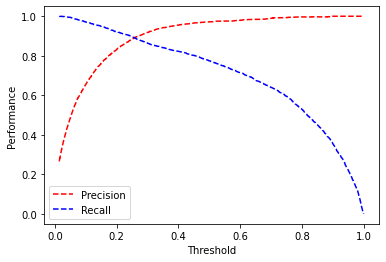

In [698]:
# Threshold PR curve

train_loss, y_true, y_prob = trainer.eval_step(dataloader = train_dataloader)

precisions, recalls, thresholds = precision_recall_curve(y_true.ravel(), y_prob.ravel())

plt.plot(thresholds, precisions[:-1], "r--", label = "Precision")

plt.plot(thresholds, recalls[:-1], "b--", label = "Recall")

plt.ylabel("Performance")

plt.xlabel("Threshold")

plt.legend(loc = "best")

In [699]:
# Determining the best threshold

def find_best_threshold(y_true, y_prob):
  """
  Find the best threshold for maximum F1."""
  precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
  f1s = (2 * precisions * recalls) / (precisions + recalls)

  return thresholds[np.argmax(f1s)]


In [700]:
# Best threshold for f1

threshold = find_best_threshold(y_true.ravel(), y_prob.ravel())

threshold

0.26187015

In [701]:
# Determining the predictions using the threshold 

test_loss, y_true, y_prob = trainer.eval_step(dataloader = test_dataloader)

y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])

In [702]:
# Evaluate

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = label_encoder.classes)

print (json.dumps(performance["overall"], indent = 2))

{
  "precision": 0.7854520633284119,
  "recall": 0.5396706239163135,
  "f1": 0.6219327610260815,
  "num_samples": 488.0
}


In [703]:
@widgets.interact(tag = list(sorted_tags_by_f1.keys()))

def display_tag_analysis(tag = "transformers"):

  # Performance 
  print (json.dumps(performance["class"][tag], indent = 2))

  # TP, FP, FN samples 
  index = label_encoder.class_to_index[tag]
  tp, fp, fn = [], [], []
  for i in range(len(y_test)):
    true = y_test[i][index]
    pred = y_pred[i][index]
    if true and pred:
      tp.append(i)
    elif not true and pred:
      fp.append(i)
    elif true and not pred:
      fn.append(i)

  # Samples
  num_samples = 3
  if len(tp):
    print ("\n=== True positives ===\n")
    for i in tp[:num_samples]:
      print (f" {X_test_raw[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")

  if len(fp):
    print ("=== False postives ===\n")
    for i in fp[:num_samples]:
      print (f" {X_test_raw[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")

  if len(fn):
    print ("=== False negatives ===\n")
    for i in fp[:num_samples]:
      print (f" {X_test_raw[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")

interactive(children=(Dropdown(description='tag', index=20, options=('language-modeling', 'autoencoders', 'tim…

In [706]:
# Save artifacts 

dir = Path("cnn")

dir.mkdir(parents = True, exist_ok = True)

tokeniser.save(fp = Path(dir, "tokeniser.json"))
label_encoder.save(fp = Path(dir, "label_encoder.json"))
torch.save(best_model.state_dict(), Path(dir, "model.pt"))

with open(Path(dir, "Performance.json"), "w") as fp:
  json.dump(performance, indent = 2, sort_keys = False, fp = fp)

In [707]:
# Inference 

# - Load artificats 

device = torch.device("cpu")

tokeniser = tokeniser.load(fp = Path(dir, "tokeniser.json"))

label_encoder = LabelEncoder.load(fp = Path(dir, "label_encoder.json"))

model = CNN(
    embedding_dim = embedding_dim, vocab_size = vocab_size, num_filters = num_filters, 
    filter_sizes = filter_sizes, hidden_dim = hidden_dim, dropout_p = dropout_p, num_classes = num_classes)

model.load_state_dict(torch.load(Path(dir, "model.pt"), map_location = device))

model.to(device)

CNN(
  (embeddings): Embedding(39, 128, padding_idx=0)
  (conv): ModuleList(
    (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
    (1): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
    (2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (3): Conv1d(128, 128, kernel_size=(4,), stride=(1,))
    (4): Conv1d(128, 128, kernel_size=(5,), stride=(1,))
    (5): Conv1d(128, 128, kernel_size=(6,), stride=(1,))
    (6): Conv1d(128, 128, kernel_size=(7,), stride=(1,))
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
    (8): Conv1d(128, 128, kernel_size=(9,), stride=(1,))
    (9): Conv1d(128, 128, kernel_size=(10,), stride=(1,))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1280, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)

In [708]:
# Initialise trainer 

trainer = Trainer(model = model, device = device)

In [709]:
# Dataloader 

text = "Transfer learning with BERT for self-supervised learning"

X = np.array(tokeniser.texts_to_sequences([preprocess(text)]))
y_filler = label_encoder.encode([np.array([label_encoder.classes[0]] * len(X))])

dataset = CNNTextDataset(X = X, y = y_filler, max_filter_size = max(filter_sizes))

dataloader = dataset.create_dataloader(batch_size = batch_size)

In [710]:
# Inference

y_prob = trainer.predict_step(dataloader)

y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])

label_encoder.decode(y_pred)

[['natural-language-processing',
  'self-supervised-learning',
  'transfer-learning']]

In [711]:
# limitations: 
# - rep - embeddings are not contextual
# - archi - extracting signal from encoded inputs is limited by filter widths

In [712]:
# RNN w/ Embeddings 

# motivation - lets see if processing our embedded tokens in a sequential fashion using RNNs can yield better performance

# Set seeds

set_seeds()

In [713]:
# Get data splits


preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)
X_test_raw = X_test

In [714]:
# Set device

cuda = True
device = torch.device('cuda' if (
    torch.cuda.is_available() and cuda) else 'cpu')
torch.set_default_tensor_type('torch.FloatTensor')
if device.type == 'cuda':
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
print (device)

cpu


In [716]:
# Tokenise 

char_level = True
tokeniser = Tokeniser(char_level = char_level)
tokeniser.fit_on_texts(texts = X_train)
vocab_size = len(tokeniser)

print ("X tokeniser: \n"
      f" {tokeniser}")

X tokeniser: 
 <Tokeniser(num_tokens = 39)>


In [717]:
tokeniser.token_to_index

{' ': 2,
 '0': 29,
 '1': 31,
 '2': 26,
 '3': 32,
 '4': 36,
 '5': 34,
 '6': 38,
 '7': 37,
 '8': 35,
 '9': 33,
 '<PAD>': 0,
 '<UNK>': 1,
 'a': 7,
 'b': 20,
 'c': 12,
 'd': 13,
 'e': 3,
 'f': 19,
 'g': 15,
 'h': 18,
 'i': 4,
 'j': 27,
 'k': 24,
 'l': 11,
 'm': 16,
 'n': 5,
 'o': 10,
 'p': 14,
 'q': 30,
 'r': 8,
 's': 9,
 't': 6,
 'u': 17,
 'v': 21,
 'w': 23,
 'x': 25,
 'y': 22,
 'z': 28}

In [718]:
# Convert texts to sequences of indices

X_train = np.array(tokeniser.texts_to_sequences(X_train))
X_val = np.array(tokeniser.texts_to_sequences(X_val))
X_test = np.array(tokeniser.texts_to_sequences(X_test))
preprocessed_text = tokeniser.sequences_to_texts([X_train[0]])[0]
print ("Text to indices:\n"
    f"  (preprocessed) → {preprocessed_text}\n"
    f"  (tokenised) → {X_train[0]}")

Text to indices:
  (preprocessed) → nba k means extraction nba statistics basketball reference com visualise detect trends patterns clustering top players using kmeans
  (tokenised) → [ 5 20  7  2 24  2 16  3  7  5  9  2  3 25  6  8  7 12  6  4 10  5  2  5
 20  7  2  9  6  7  6  4  9  6  4 12  9  2 20  7  9 24  3  6 20  7 11 11
  2  8  3 19  3  8  3  5 12  3  2 12 10 16  2 21  4  9 17  7 11  4  9  3
  2 13  3  6  3 12  6  2  6  8  3  5 13  9  2 14  7  6  6  3  8  5  9  2
 12 11 17  9  6  3  8  4  5 15  2  6 10 14  2 14 11  7 22  3  8  9  2 17
  9  4  5 15  2 24 16  3  7  5  9]


In [719]:
# Class weights

counts = np.bincount([label_encoder.class_to_index[class_] for class_ in all_tags])
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: [120  41 388 106  41  75  34  73  51  78  64  51  55  93  51 429  33  69
  30  51 258  32  49  59  57  60  48  40 213  40  34  46 196  39  39],
class weights: {0: 0.008333333333333333, 1: 0.024390243902439025, 2: 0.002577319587628866, 3: 0.009433962264150943, 4: 0.024390243902439025, 5: 0.013333333333333334, 6: 0.029411764705882353, 7: 0.0136986301369863, 8: 0.0196078431372549, 9: 0.01282051282051282, 10: 0.015625, 11: 0.0196078431372549, 12: 0.01818181818181818, 13: 0.010752688172043012, 14: 0.0196078431372549, 15: 0.002331002331002331, 16: 0.030303030303030304, 17: 0.014492753623188406, 18: 0.03333333333333333, 19: 0.0196078431372549, 20: 0.003875968992248062, 21: 0.03125, 22: 0.02040816326530612, 23: 0.01694915254237288, 24: 0.017543859649122806, 25: 0.016666666666666666, 26: 0.020833333333333332, 27: 0.025, 28: 0.004694835680751174, 29: 0.025, 30: 0.029411764705882353, 31: 0.021739130434782608, 32: 0.00510204081632653, 33: 0.02564102564102564, 34: 0.02564102564102564}

In [723]:
# Datasets

class RNNTextDataset(torch.utils.data.Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __str__(self):
    return f"<Dataset(N = {len(self)})>"

  def __getitem__(self, index):
    X = self.X[index]
    y = self.y[index]
    return [X, len(X), y]

  def collate_fn(self, batch):
    """Processing on batch."""

    # Get inputs
    X = np.array(batch, dtype = object)[:,0]
    seq_lens = np.array(batch, dtype = object)[:, 1]
    y = np.stack(np.array(batch, dtype = object)[:, 2], axis = 0)

    # Pad inputs
    X = pad_sequences(sequences = X)

    # Cast
    X = torch.LongTensor(X.astype(np.int32))
    seq_lens = torch.LongTensor(seq_lens.astype(np.int32))
    y = torch.FloatTensor(y.astype(np.int32))

    return X, seq_lens, y
  
  def create_dataloader(self, batch_size, shuffle = False, drop_last = False):
    return torch.utils.data.DataLoader(
        dataset = self, 
        batch_size = batch_size, 
        collate_fn = self.collate_fn, 
        shuffle = shuffle, 
        drop_last = drop_last, 
        pin_memory = True)

In [724]:
# Create datasets

batch_size = 128

train_dataset = RNNTextDataset(X = X_train, y = y_train)

val_dataset = RNNTextDataset(X = X_val, y = y_val)

test_dataset = RNNTextDataset(X = X_test, y = y_test)

print ("Data splits: \n"
    f"  Train dataset: {train_dataset.__str__()}\n"
    f"  Val dataset: {val_dataset.__str__()}\n"
    f"  Test dataset: {test_dataset.__str__()}\n"
    "Sample point: \n"
    f" X: {train_dataset[0][0]}\n"
    f" seq_len: {train_dataset[0][1]}\n"
    f" y: {train_dataset[0][2]}")

Data splits: 
  Train dataset: <Dataset(N = 1008)>
  Val dataset: <Dataset(N = 213)>
  Test dataset: <Dataset(N = 223)>
Sample point: 
 X: [ 5 20  7  2 24  2 16  3  7  5  9  2  3 25  6  8  7 12  6  4 10  5  2  5
 20  7  2  9  6  7  6  4  9  6  4 12  9  2 20  7  9 24  3  6 20  7 11 11
  2  8  3 19  3  8  3  5 12  3  2 12 10 16  2 21  4  9 17  7 11  4  9  3
  2 13  3  6  3 12  6  2  6  8  3  5 13  9  2 14  7  6  6  3  8  5  9  2
 12 11 17  9  6  3  8  4  5 15  2  6 10 14  2 14 11  7 22  3  8  9  2 17
  9  4  5 15  2 24 16  3  7  5  9]
 seq_len: 131
 y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [727]:
# Create dataloaders

train_dataloader = train_dataset.create_dataloader(batch_size = batch_size)

val_dataloader = val_dataset.create_dataloader(batch_size = batch_size)

test_dataloader = test_dataset.create_dataloader(batch_size = batch_size)

batch_X, batch_seq_lens, batch_y = next(iter(train_dataloader))

print (batch_X.shape)

print ("Sample batch: \n"
    f" X: {list(batch_X.size())}\n"
    f" seq_lens: {list(batch_seq_lens.size())}\n"
    f" y: {list(batch_y.size())}")

torch.Size([128, 176])
Sample batch: 
 X: [128, 176]
 seq_lens: [128]
 y: [128, 35]


In [728]:
# Arguments
embedding_dim = 128
rnn_hidden_dim = 128
hidden_dim = 128
dropout_p = 0.5

In [729]:
def gather_last_relevant_hidden(hiddens, seq_lens):
    """Extract and collect the last relevant
    hidden state based on the sequence length."""
    seq_lens = seq_lens.long().detach().cpu().numpy() - 1
    out = []
    for batch_index, column_index in enumerate(seq_lens):
        out.append(hiddens[batch_index, column_index])
    return torch.stack(out)

In [730]:
class RNN(nn.Module):
    def __init__(self, embedding_dim, vocab_size, rnn_hidden_dim,
                 hidden_dim, dropout_p, num_classes, padding_idx=0):
        super(RNN, self).__init__()

        # Initialize embeddings
        self.embeddings = nn.Embedding(embedding_dim=embedding_dim,
                                       num_embeddings=vocab_size,
                                       padding_idx=padding_idx)

        # RNN
        self.rnn = nn.GRU(embedding_dim, rnn_hidden_dim,
                          batch_first=True, bidirectional=True)

        # FC weights
        self.dropout = nn.Dropout(dropout_p)
        self.fc1 = nn.Linear(rnn_hidden_dim*2, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, inputs):
        # Inputs
        x_in, seq_lens = inputs

        # Embed
        x_in = self.embeddings(x_in)

        # Rnn outputs
        out, h_n = self.rnn(x_in)
        z = gather_last_relevant_hidden(hiddens=out, seq_lens=seq_lens)

        # FC layers
        z = self.fc1(z)
        z = self.dropout(z)
        z = self.fc2(z)

        return z

In [731]:
# Initialize model

model = RNN(
    embedding_dim=embedding_dim, vocab_size=vocab_size,
    rnn_hidden_dim=rnn_hidden_dim, hidden_dim=hidden_dim,
    dropout_p=dropout_p, num_classes=num_classes)
model = model.to(device)
print (model.named_parameters)

<bound method Module.named_parameters of RNN(
  (embeddings): Embedding(39, 128, padding_idx=0)
  (rnn): GRU(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)>


In [732]:
# Arguments

lr = 2e-3
num_epochs = 200
patience = 10

In [733]:
# Define loss

class_weights_tensor = torch.Tensor(np.array(list(class_weights.values())))
loss = nn.BCEWithLogitsLoss(weight=class_weights_tensor)

In [735]:
# Define optimizer & scheduler

optimiser = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimiser, mode='min', factor=0.1, patience=5)

In [736]:
# Trainer module

trainer = Trainer(model = model, device = device, loss = loss, optimiser = optimiser, scheduler = scheduler)

In [737]:
# Train 

best_model = trainer.train(num_epochs, patience, train_dataloader, val_dataloader)

Epoch: 1 |train_loss: 0.00837, val_loss: 0.00308, lr: 2.00E-03, _patience: 10
Epoch: 2 |train_loss: 0.00399, val_loss: 0.00344, lr: 2.00E-03, _patience: 9
Epoch: 3 |train_loss: 0.00329, val_loss: 0.00288, lr: 2.00E-03, _patience: 10
Epoch: 4 |train_loss: 0.00309, val_loss: 0.00275, lr: 2.00E-03, _patience: 10
Epoch: 5 |train_loss: 0.00296, val_loss: 0.00269, lr: 2.00E-03, _patience: 10
Epoch: 6 |train_loss: 0.00287, val_loss: 0.00267, lr: 2.00E-03, _patience: 10
Epoch: 7 |train_loss: 0.00280, val_loss: 0.00267, lr: 2.00E-03, _patience: 9
Epoch: 8 |train_loss: 0.00275, val_loss: 0.00266, lr: 2.00E-03, _patience: 10
Epoch: 9 |train_loss: 0.00273, val_loss: 0.00266, lr: 2.00E-03, _patience: 10
Epoch: 10 |train_loss: 0.00269, val_loss: 0.00265, lr: 2.00E-03, _patience: 10
Epoch: 11 |train_loss: 0.00264, val_loss: 0.00266, lr: 2.00E-03, _patience: 9
Epoch: 12 |train_loss: 0.00266, val_loss: 0.00266, lr: 2.00E-03, _patience: 8
Epoch: 13 |train_loss: 0.00264, val_loss: 0.00267, lr: 2.00E-03, 

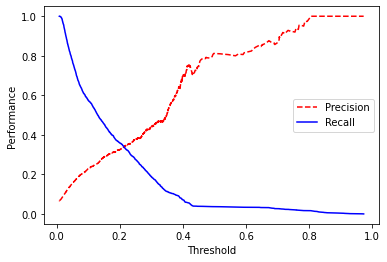

In [738]:
# Threshold-PR curve

train_loss, y_true, y_prob = trainer.eval_step(dataloader=train_dataloader)

precisions, recalls, thresholds = precision_recall_curve(y_true.ravel(), y_prob.ravel())

plt.plot(thresholds, precisions[:-1], "r--", label="Precision")

plt.plot(thresholds, recalls[:-1], "b-", label="Recall")

plt.ylabel("Performance")
plt.xlabel("Threshold")
plt.legend(loc='best')

In [739]:
# Best threshold for f1

threshold = find_best_threshold(y_true.ravel(), y_prob.ravel())
threshold

0.15217918

In [742]:
# Determine predictions using threshold

test_loss, y_true, y_prob = trainer.eval_step(dataloader=test_dataloader)

y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])

In [743]:
# Evaluate

performance = get_performance(y_true = y_test, y_pred = y_pred, classes = label_encoder.classes)

print (json.dumps(performance['overall'], indent=2))

{
  "precision": 0.14217162772922073,
  "recall": 0.13774763824024908,
  "f1": 0.10576086280467452,
  "num_samples": 488.0
}


In [744]:
@widgets.interact(tag = list(sorted_tags_by_f1.keys()))

def display_tag_analysis(tag = "transformers"):

  # Performance 
  print (json.dumps(performance["class"][tag], indent = 2))

  # TP, FP, FN samples 
  index = label_encoder.class_to_index[tag]
  tp, fp, fn = [], [], []
  for i in range(len(y_test)):
    true = y_test[i][index]
    pred = y_pred[i][index]
    if true and pred:
      tp.append(i)
    elif not true and pred:
      fp.append(i)
    elif true and not pred:
      fn.append(i)

  # Samples
  num_samples = 3
  if len(tp):
    print ("\n=== True positives ===\n")
    for i in tp[:num_samples]:
      print (f" {X_test_raw[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")

  if len(fp):
    print ("=== False postives ===\n")
    for i in fp[:num_samples]:
      print (f" {X_test_raw[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")

  if len(fn):
    print ("=== False negatives ===\n")
    for i in fp[:num_samples]:
      print (f" {X_test_raw[i]}")
      print (f" true: {label_encoder.decode([y_test[i]])[0]}")
      print (f" pred: {label_encoder.decode([y_pred[i]])[0]}\n")

interactive(children=(Dropdown(description='tag', index=20, options=('language-modeling', 'autoencoders', 'tim…

In [745]:
# Save artifacts 

dir = Path("rnn")
dir.mkdir(parents = True, exist_ok = True)
tokeniser.save(fp = Path(dir, "tokeniser.json"))
label_encoder.save(fp = Path(dir, "label_encoder.json"))
torch.save(best_model.state_dict(), Path(dir, "model.pt"))

with open(Path(dir, "performance.json"), "w") as fp:
  json.dump(performance, indent = 2, sort_keys = False, fp = fp)

In [746]:
# Inference

# - initialise model 

model = RNN(embedding_dim = embedding_dim, vocab_size = vocab_size,
            rnn_hidden_dim = rnn_hidden_dim, hidden_dim = hidden_dim,
            dropout_p = dropout_p, num_classes = num_classes)

model = model.to(device)

print (f"Model: \n{model.named_parameters}")

Model: 
<bound method Module.named_parameters of RNN(
  (embeddings): Embedding(39, 128, padding_idx=0)
  (rnn): GRU(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)>


In [748]:
# Load artificats

device = torch.device("cpu")
tokeniser = Tokeniser.load(fp = Path(dir, "tokeniser.json"))

label_encoder = LabelEncoder.load(fp = Path(dir, "label_encoder.json"))

model = RNN(embedding_dim = embedding_dim, vocab_size = vocab_size, 
            rnn_hidden_dim = rnn_hidden_dim, hidden_dim = hidden_dim, dropout_p = dropout_p, num_classes = num_classes)

model.load_state_dict(torch.load(Path(dir, "model.pt"), map_location = device))
model.to(device)

RNN(
  (embeddings): Embedding(39, 128, padding_idx=0)
  (rnn): GRU(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)

In [749]:
# Initialise trainer 

trainer = Trainer(model = model, device = device)

In [750]:
# Dataloader

text = "Transfer learning with BERT for self supervised learning"

X = np.array(tokeniser.texts_to_sequences([preprocess(text)]))
y_filler = label_encoder.encode([np.array([label_encoder.classes[0]] * len(X))])

dataset = RNNTextDataset(X = X, y = y_filler)

dataloader = dataset.create_dataloader(batch_size = batch_size)

In [751]:
# Inference

y_prob = trainer.predict_step(dataloader)

y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])

label_encoder.decode(y_pred)

[[]]

In [752]:
### limitations: since we're using character embeddings our encoded sequences are quite long (>100), the RNNs may potentially be suffering from memory issues. 
# We also can't process our tokens in parallel because we're restricted by sequential processing.